In [1]:
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
from matplotlib.colors import ListedColormap
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.ticker import MaxNLocator
import seaborn as sns
import os
import gzip
import numpy as np
import scanpy as sc
import squidpy as sq
import cupy as cp
import cupyx
from cupyx.scipy.sparse import csr_matrix 
import os
import time
import rapids_singlecell as rsc
import numpy as np
import rmm
from rmm.allocators.cupy import rmm_cupy_allocator
import cupy

rmm.reinitialize(
    managed_memory=False,  # Allows oversubscription
    pool_allocator=False,  # default is False
    devices=0,  # GPU device IDs to register. By default registers only GPU 0.
)
cp.cuda.set_allocator(rmm_cupy_allocator)
import zarr
import pickle
from collections import OrderedDict
from scipy.sparse import csr_matrix
import pandas as pd
import scipy.stats as stats
from statsmodels.stats.multitest import multipletests
from scipy.sparse import csr_matrix
import scipy
import anndata
from collections import OrderedDict

In [2]:
import warnings
warnings.simplefilter("ignore", FutureWarning)
warnings.simplefilter("ignore", UserWarning)
warnings.simplefilter("ignore", RuntimeWarning)

Unintegrated umap

In [3]:
pathout = '/data/kanferg/Sptial_Omics/projects/NguyenLab/spatialomicstoolkit/out_1'
adata_concat = sc.read_h5ad(os.path.join(pathout, "andata_filter_logNorm_hvg_leiden_harmony_scvi_con_mouse_cov.h5ad"))
rsc.get.anndata_to_GPU(adata_concat)
rsc.pp.neighbors(adata_concat, n_pcs = 10, use_rep =  "X_pca_before",key_added = 'before_int',n_neighbors=30)
rsc.tl.leiden(adata_concat, random_state=1337, resolution=0.667, key_added='cluster', neighbors_key='before_int')
rsc.tl.umap(adata_concat, neighbors_key="before_int")
adata_concat.obsm['Unintegrated_umap'] = adata_concat.obsm['X_umap']
del adata_concat.obsm['X_umap']
andata_save = adata_concat.copy()
andata_save.write_h5ad(os.path.join(pathout, "andata_filter_logNorm_hvg_leiden_harmony_scvi_con_mouse_cov_umap.h5ad"))
del andata_save
del adata_concat

Harmony

In [4]:
pathout = '/data/kanferg/Sptial_Omics/projects/NguyenLab/spatialomicstoolkit/out_1'
adata_concat = sc.read_h5ad(os.path.join(pathout, "andata_filter_logNorm_hvg_leiden_harmony_scvi_con_mouse_cov_umap.h5ad"))
rsc.get.anndata_to_GPU(adata_concat)
rsc.pp.neighbors(adata_concat, n_pcs = 10, use_rep =  "X_pca_Harmony",key_added = 'HarmonyNigb',n_neighbors=30)
from tqdm import tqdm 
res = np.linspace(0,2,10)
clust_num = []
for r in tqdm(res):
    rsc.tl.leiden(adata_concat, random_state=1337, resolution=r, key_added='cluster_Harmony')
    clust_num.append(len(pd.unique(adata_concat.obs['cluster_Harmony']))) 

100%|█████████████████████████████████████████████████████████████████████████████████| 10/10 [01:27<00:00,  8.80s/it]


In [5]:
pd.DataFrame({'resolution':res,'k_num':clust_num}).T

,0,1,2,3,4,5,6,7,8,9
resolution,0.0,0.222222,0.444444,0.666667,0.888889,1.111111,1.333333,1.555556,1.777778,2.0
k_num,1.0,9.000000,13.000000,15.000000,19.000000,24.000000,27.000000,34.000000,35.000000,41.0


In [6]:
rsc.tl.leiden(adata_concat, random_state=1337, resolution=0.667, key_added='cluster_Harmony', neighbors_key='HarmonyNigb')
rsc.tl.umap(adata_concat, neighbors_key="HarmonyNigb")
adata_concat.obsm['harmony_umap'] = adata_concat.obsm['X_umap']
del adata_concat.obsm['X_umap']
andata_save = adata_concat.copy()
andata_save.write_h5ad(os.path.join(pathout, "andata_filter_logNorm_hvg_leiden_harmony_scvi_con_mouse_cov_umap.h5ad"))
del andata_save
del adata_concat

scVI

In [7]:
pathout = '/data/kanferg/Sptial_Omics/projects/NguyenLab/spatialomicstoolkit/out_1'
adata_concat = sc.read_h5ad(os.path.join(pathout, "andata_filter_logNorm_hvg_leiden_harmony_scvi_con_mouse_cov_umap.h5ad"))
rsc.get.anndata_to_GPU(adata_concat)
rsc.pp.neighbors(adata_concat, n_pcs = 10,use_rep =  "X_scVI",key_added = 'scVInigb',n_neighbors=30)
rsc.tl.leiden(adata_concat, random_state=1337, resolution=0.667, key_added='cluster_scVI', neighbors_key='scVInigb')
rsc.tl.umap(adata_concat, neighbors_key="scVInigb")
adata_concat.obsm['scVI_umap'] = adata_concat.obsm['X_umap']
del adata_concat.obsm['X_umap']
andata_save = adata_concat.copy()
andata_save.write_h5ad(os.path.join(pathout, "andata_filter_logNorm_hvg_leiden_harmony_scvi_con_mouse_cov_umap.h5ad"))
del andata_save
del adata_concat

cell2loc

In [9]:
pathout = '/data/kanferg/Sptial_Omics/projects/NguyenLab/spatialomicstoolkit/out_1'
results_folder = '/data/kanferg/Sptial_Omics/projects/NguyenLab/spatialomicstoolkit/results_spec/cell2loc'
adata_vis = sc.read_h5ad(os.path.join(results_folder, "adata_vis.h5ad"))
adata_concat = sc.read_h5ad(os.path.join(pathout, "andata_filter_logNorm_hvg_leiden_harmony_scvi_con_mouse_cov_umap.h5ad"))
adata_concat.obsm['X_cell2loc'] = adata_vis.obsm['q05_cell_abundance_w_sf'].to_numpy()
adata_concat.uns['q05_cell_abundance_w_sf'] = adata_vis.obsm['q05_cell_abundance_w_sf']


In [10]:
rsc.get.anndata_to_GPU(adata_concat)
rsc.pp.neighbors(adata_concat, n_pcs = 56, use_rep =  'X_cell2loc',key_added = 'cell2locNigb',n_neighbors=30)

In [11]:
rsc.tl.leiden(adata_concat, random_state=1337, resolution=0.67, key_added='cluster_cell2loc',neighbors_key='cell2locNigb') 
rsc.tl.umap(adata_concat, neighbors_key="cell2locNigb",random_state=42537)
adata_concat.obsm['cell2lo_umap'] = adata_concat.obsm['X_umap']
del adata_concat.obsm['X_umap']
andata_save = adata_concat.copy()
andata_save.write_h5ad(os.path.join(pathout, "andata_filter_logNorm_hvg_leiden_harmony_scvi_con_mouse_cov_umap.h5ad"))
del andata_save
del adata_concat

<center>Evaluating Batch Effect Removal and Biological Variance in Data Integration

In [30]:
import anndata as ad

In [33]:
pathout = '/data/kanferg/Sptial_Omics/projects/NguyenLab/spatialomicstoolkit/out_1'
adata_concat = sc.read_h5ad(os.path.join(pathout, "andata_filter_logNorm_hvg_leiden_harmony_scvi_con_mouse_cov_umap.h5ad"))

In [34]:
Experimental_design_file = '/data/kanferg/Sptial_Omics/projects/NguyenLab/spatialomicstoolkit/Experimental_design/Experimental_Design.csv'
ed = pd.read_csv(Experimental_design_file)
column_sel = ed.columns[2:4].tolist()+ed.columns[5:8].tolist()

from tqdm import tqdm
# adding covrites per batch to andata
for column in column_sel:
    adata_concat.obs[column] = None
    for batch in tqdm(ed['Polygon']):
        covraite_temp = ed.loc[ed["Polygon"]==batch,column].values.tolist()*len(adata_concat.obs.loc[adata_concat.obs["batch"]==str(batch),column])
        adata_concat.obs.loc[adata_concat.obs["batch"]==str(batch),column] = covraite_temp
        # if isinstance(adata_concat.obs[column].dtype, pd.CategoricalDtype):
        #     print('not') 
        # else:
        #     adata_concat.obs[column] = adata_concat.obs[column].astype("category")

100%|████████████████████████████████████████████████████████████████████████████████| 62/62 [00:00<00:00, 190.98it/s]


In [35]:
adata_concat.obs['Condition '] = adata_concat.obs['Condition '].astype("category")
adata_concat.obs['Technical_repeat'] = adata_concat.obs['Technical_repeat'].astype("category")
adata_concat.obs['Mouse_ID'] = adata_concat.obs['Mouse_ID'].astype("category")
adata_concat.obs['Harvest_Day'] = adata_concat.obs['Mouse_ID'].astype("category")

4 days technical repeats (Mock)
22,38 \
8 days technical repeats (Mock) \
27,30

In [36]:
def select_slide(adata, s, s_col='sample'):
    r""" Select data for one slide from the spatial anndata object.

    :param adata: Anndata object with multiple spatial samples
    :param s: name of selected sample
    :param s_col: column in adata.obs listing sample name for each location
    """
    slide = adata[adata.obs[s_col]==s,:].copy()
    return slide

In [37]:
sample_sel = [58,54,50,26,1,56,27,30]
sample_sel = [str(i) for i in sample_sel]
mock_andata = ad.concat([select_slide(adata_concat,s = b, s_col = "batch") for b in sample_sel])

In [1]:
def umpa_plot_contaner(size = 5):
    sc.pl.umap(mock_andata, color="cluster", ax=ax[0], show=False,size = size)  # First subplot
    sc.pl.umap(mock_andata, color="Mouse_ID", ax=ax[1], show=False,size =size)  # Second subplot
    sc.pl.umap(mock_andata, color="Technical_repeat", ax=ax[2], show=False,size = size)  # First subplot
    sc.pl.umap(mock_andata, color="Harvest_Day", ax=ax[3], show=False,size =size)  # Second subplot

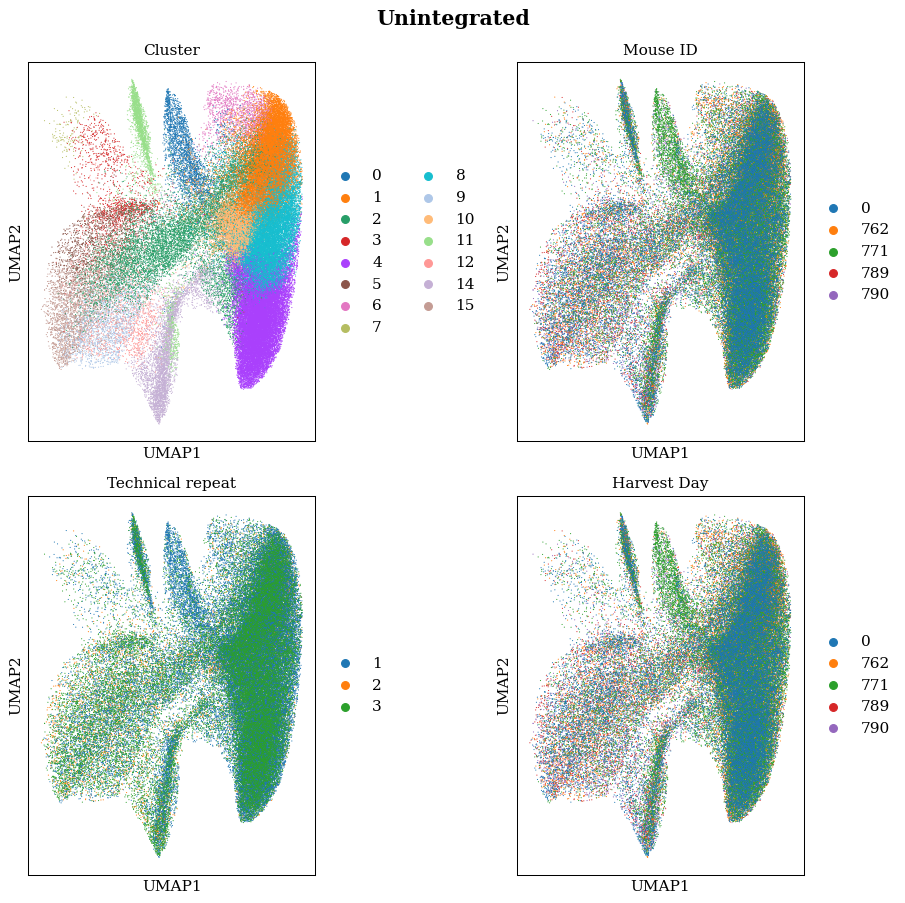

In [54]:
fig, ax = plt.subplots(2, 2, figsize=(10, 10))
ax = ax.ravel()

# Adjust matplotlib settings
plt.rcParams['figure.dpi'] = 92
plt.rcParams['font.family'] = ['serif']
plt.rcParams['font.size'] = 12
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['axes.titlesize'] = 12
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# Directly use the UMAP data from 'harmony_umap'
mock_andata.obsm['X_umap'] = mock_andata.obsm['harmony_umap']
# Plot on specific axes

umpa_plot_contaner(size = 3)

# Add titles to individual plots
ax[0].set_title("Cluster")
ax[1].set_title("Mouse ID")
ax[2].set_title("Technical repeat")
ax[3].set_title("Harvest Day")
plt.suptitle("Unintegrated", fontsize=16, fontweight='bold')
# Adjust layout to avoid overlaps
plt.tight_layout()

# Show the plot
plt.show()

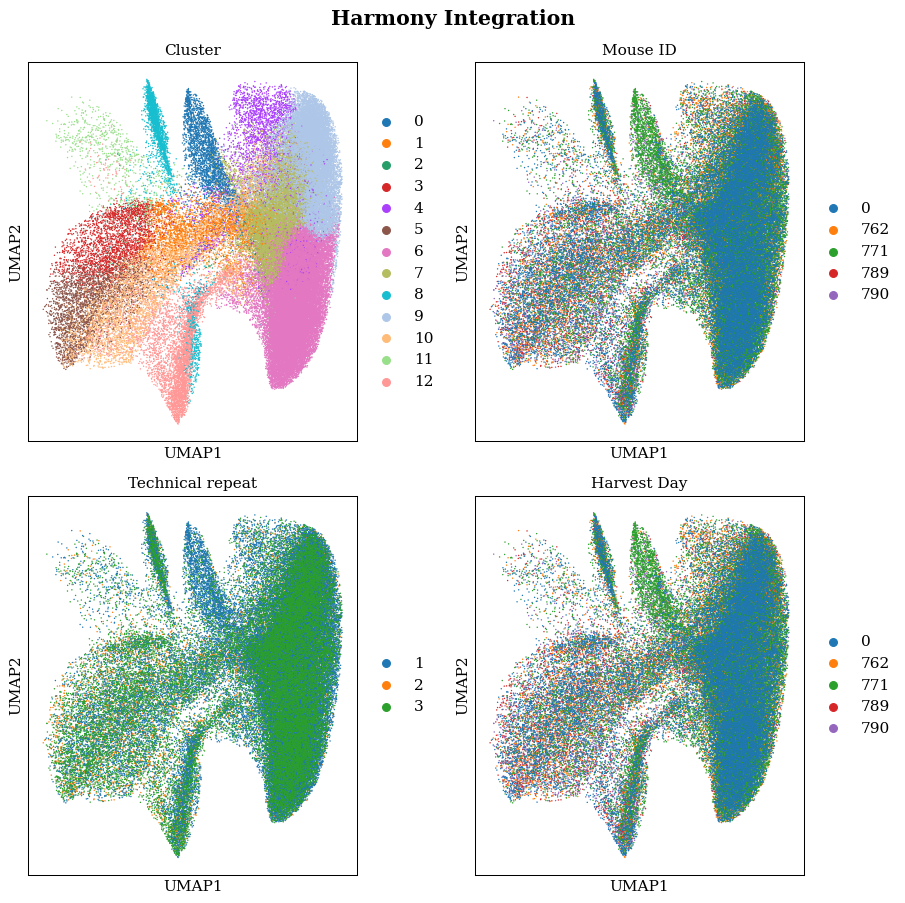

In [55]:
fig, ax = plt.subplots(2, 2, figsize=(10, 10))
ax = ax.ravel()

# Adjust matplotlib settings
plt.rcParams['figure.dpi'] = 92
plt.rcParams['font.family'] = ['serif']
plt.rcParams['font.size'] = 12
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['axes.titlesize'] = 12
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# Directly use the UMAP data from 'harmony_umap'
mock_andata.obsm['X_umap'] = mock_andata.obsm['harmony_umap']
# Plot on specific axes
sc.pl.umap(mock_andata, color="cluster_Harmony", ax=ax[0], show=False,size = 5)  # First subplot
sc.pl.umap(mock_andata, color="Mouse_ID", ax=ax[1], show=False,size =5)  # Second subplot
sc.pl.umap(mock_andata, color="Technical_repeat", ax=ax[2], show=False,size = 5)  # First subplot
sc.pl.umap(mock_andata, color="Harvest_Day", ax=ax[3], show=False,size =5)  # Second subplot

# Add titles to individual plots
ax[0].set_title("Cluster")
ax[1].set_title("Mouse ID")
ax[2].set_title("Technical repeat")
ax[3].set_title("Harvest Day")
plt.suptitle("Harmony Integration", fontsize=16, fontweight='bold')
# Adjust layout to avoid overlaps
plt.tight_layout()

# Show the plot
plt.show()

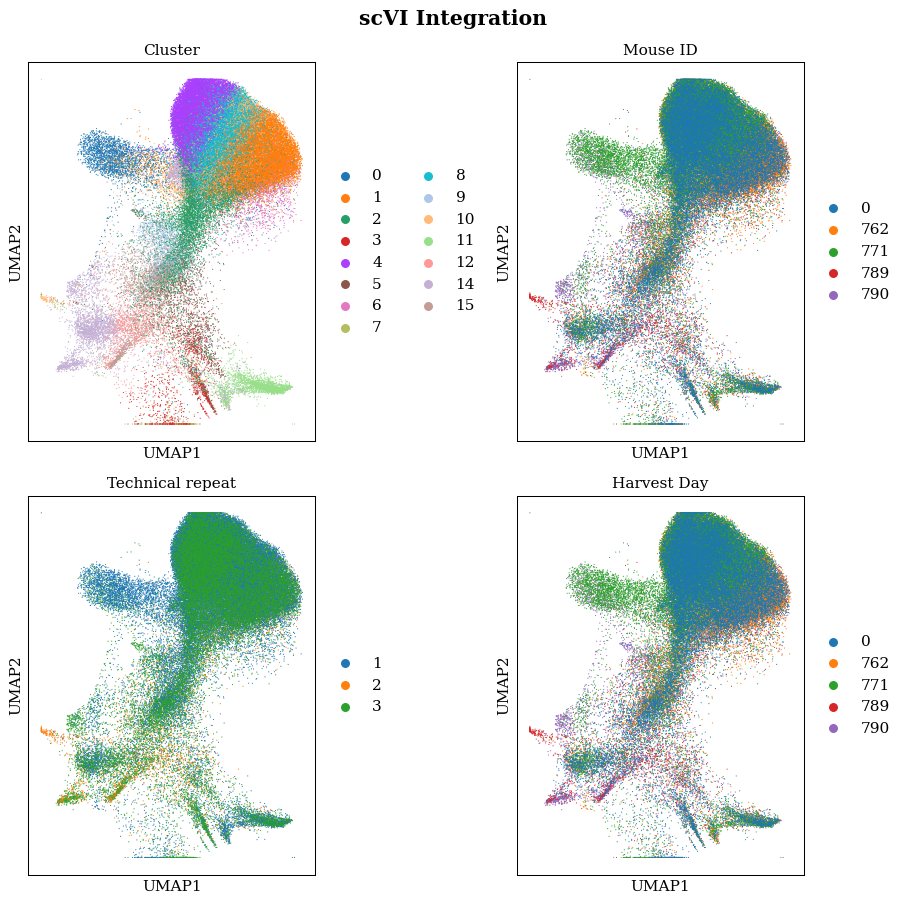

In [57]:
fig, ax = plt.subplots(2, 2, figsize=(10, 10))
ax = ax.ravel()

# Adjust matplotlib settings
plt.rcParams['figure.dpi'] = 92
plt.rcParams['font.family'] = ['serif']
plt.rcParams['font.size'] = 12
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['axes.titlesize'] = 12
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
# Clip scVI_umap values
mock_andata.obsm['scVI_umap_clipped'] = mock_andata.obsm['scVI_umap'].clip(-10, 10)
# Center the clipped UMAP values
mock_andata.obsm['scVI_umap_centered'] = mock_andata.obsm['scVI_umap_clipped'] - mock_andata.obsm['scVI_umap_clipped'].mean(axis=0)

# Assign the centered UMAP to X_umap and plot
mock_andata.obsm['X_umap'] = mock_andata.obsm['scVI_umap_centered']

# Plot on specific axes
umpa_plot_contaner(size = 3)

# Add titles to individual plots
ax[0].set_title("Cluster")
ax[1].set_title("Mouse ID")
ax[2].set_title("Technical repeat")
ax[3].set_title("Harvest Day")
plt.suptitle("scVI Integration", fontsize=16, fontweight='bold')
# Adjust layout to avoid overlaps
plt.tight_layout()

# Show the plot
plt.show()

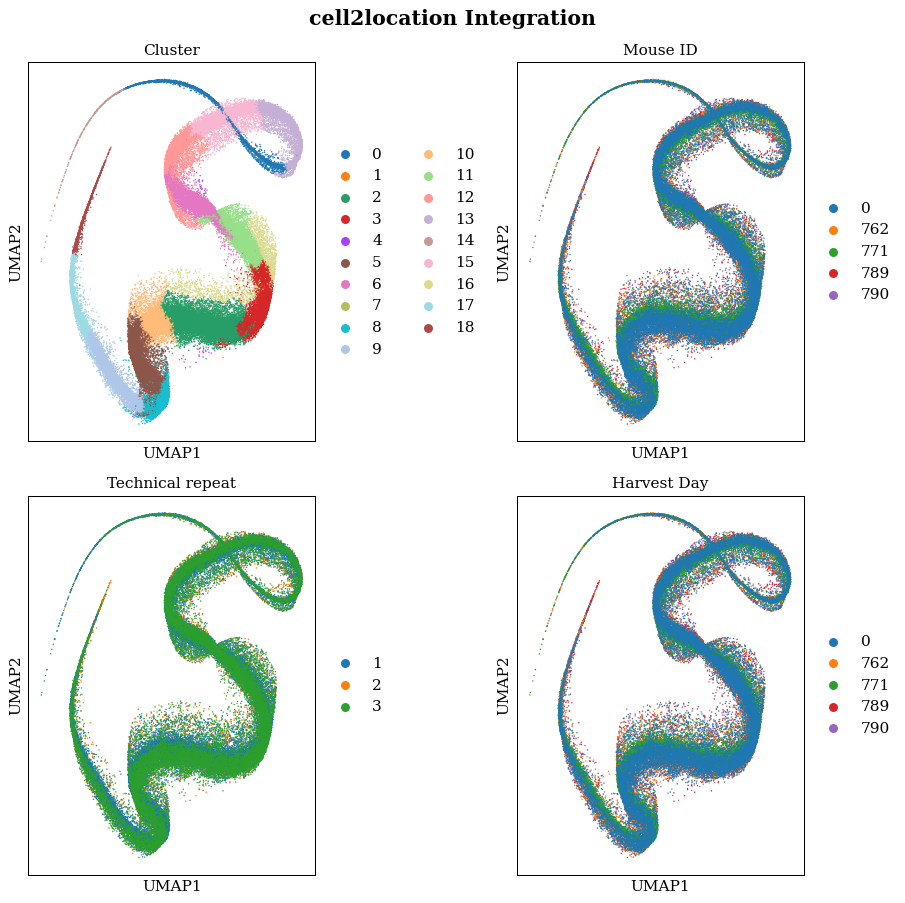

In [46]:
fig, ax = plt.subplots(2, 2, figsize=(10, 10))
ax = ax.ravel()

# Adjust matplotlib settings
plt.rcParams['figure.dpi'] = 92
plt.rcParams['font.family'] = ['serif']
plt.rcParams['font.size'] = 12
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['axes.titlesize'] = 12
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# Directly use the UMAP data from 'harmony_umap'
mock_andata.obsm['X_umap'] = mock_andata.obsm['cell2lo_umap']
# Plot on specific axes
sc.pl.umap(mock_andata, color="cluster_cell2loc", ax=ax[0], show=False,size = 5)  # First subplot
sc.pl.umap(mock_andata, color="Mouse_ID", ax=ax[1], show=False,size =5)  # Second subplot
sc.pl.umap(mock_andata, color="Technical_repeat", ax=ax[2], show=False,size = 5)  # First subplot
sc.pl.umap(mock_andata, color="Harvest_Day", ax=ax[3], show=False,size =5)  # Second subplot

# Add titles to individual plots
ax[0].set_title("Cluster")
ax[1].set_title("Mouse ID")
ax[2].set_title("Technical repeat")
ax[3].set_title("Harvest Day")
plt.suptitle("cell2location Integration", fontsize=16, fontweight='bold')
# Adjust layout to avoid overlaps
plt.tight_layout()

# Show the plot
plt.show()

```bash
source myconda  
mamba activate scib-metrics
```

In [7]:
import os
import tempfile

from PIL import Image
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.backends.backend_pdf import PdfPages
import random
import pandas as pd


import numpy as np
import scanpy as sc
import seaborn as sns
#import torch
from scib_metrics.benchmark import Benchmarker, BioConservation, BatchCorrection

import faiss

from scib_metrics.nearest_neighbors import NeighborsResults
import anndata as ad

In [8]:
pathout = '/data/kanferg/Sptial_Omics/projects/NguyenLab/spatialomicstoolkit/out_1'
adata_concat = sc.read_h5ad(os.path.join(pathout, "andata_filter_logNorm_hvg_leiden_harmony_scvi_con_mouse_cov_umap.h5ad"))

In [9]:
Experimental_design_file = '/data/kanferg/Sptial_Omics/projects/NguyenLab/spatialomicstoolkit/Experimental_design/Experimental_Design.csv'
ed = pd.read_csv(Experimental_design_file)
column_sel = ed.columns[2:4].tolist()+ed.columns[5:8].tolist()

from tqdm import tqdm
# adding covrites per batch to andata
for column in column_sel:
    adata_concat.obs[column] = None
    for batch in tqdm(ed['Polygon']):
        covraite_temp = ed.loc[ed["Polygon"]==batch,column].values.tolist()*len(adata_concat.obs.loc[adata_concat.obs["batch"]==str(batch),column])
        adata_concat.obs.loc[adata_concat.obs["batch"]==str(batch),column] = covraite_temp

adata_concat.obs['Condition '] = adata_concat.obs['Condition '].astype("category")
adata_concat.obs['Technical_repeat'] = adata_concat.obs['Technical_repeat'].astype("category")
adata_concat.obs['Mouse_ID'] = adata_concat.obs['Mouse_ID'].astype("category")
adata_concat.obs['Harvest_Day'] = adata_concat.obs['Mouse_ID'].astype("category")

def select_slide(adata, s, s_col='sample'):
    r""" Select data for one slide from the spatial anndata object.

    :param adata: Anndata object with multiple spatial samples
    :param s: name of selected sample
    :param s_col: column in adata.obs listing sample name for each location
    """
    slide = adata[adata.obs[s_col]==s,:].copy()
    return slide

sample_sel = [58,54,50,26,1,56,27,30]
sample_sel = [str(i) for i in sample_sel]
mock_andata = ad.concat([select_slide(adata_concat,s = b, s_col = "batch") for b in sample_sel])

100%|████████████████████████████████████████████████████████████████████████████████| 62/62 [00:00<00:00, 188.90it/s]


In [10]:
mock_andata.obs.columns

Index(['cell_id', 'transcript_counts', 'control_probe_counts',
       'genomic_control_counts', 'control_codeword_counts',
       'unassigned_codeword_counts', 'deprecated_codeword_counts',
       'total_counts', 'cell_area', 'nucleus_area', 'nucleus_count',
       'segmentation_method', 'region', 'z_level', 'cell_labels', 'batch',
       'n_genes_by_counts', 'log1p_n_genes_by_counts', 'log1p_total_counts',
       'outlier', 'cluster', '_scvi_batch', '_scvi_labels', 'cluster_Harmony',
       'cluster_scVI', 'cluster_cell2loc', 'Sample_ID', 'Condition ',
       'Technical_repeat', 'Mouse_ID', 'Harvest_Day'],
      dtype='object')

In [15]:
from anndata import AnnData
obsm_before = mock_andata.obsm['X_pca_before']
obsm_harmony = mock_andata.obsm['X_pca_Harmony']
obsm_scvi = mock_andata.obsm['X_scVI']
obsm_cell2loc = mock_andata.obsm['X_cell2loc']
obs_batch = mock_andata.obs['batch'].astype(str).tolist()
obs_celltype = mock_andata.obs['cluster'].astype(str).tolist()
obs_n = mock_andata.obs['total_counts'].values

adata = AnnData(mock_andata.layers['counts'], obsm={"spatial": mock_andata.obsm['spatial'],'Unintegrated':obsm_before,'Harmony':obsm_harmony,'scVI':obsm_scvi,'cell2loc':obsm_cell2loc},obs = {"batch":obs_batch,"cellType":obs_celltype,'total_counts':obs_n})

In [18]:
def faiss_hnsw_nn(X: np.ndarray, k: int):
    """Gpu HNSW nearest neighbor search using faiss.

    See https://github.com/nmslib/hnswlib/blob/master/ALGO_PARAMS.md
    for index param details.
    """
    X = np.ascontiguousarray(X, dtype=np.float32)
    res = faiss.StandardGpuResources()
    M = 32
    index = faiss.IndexHNSWFlat(X.shape[1], M, faiss.METRIC_L2)
    gpu_index = faiss.index_cpu_to_gpu(res, 0, index)
    gpu_index.add(X)
    distances, indices = gpu_index.search(X, k)
    del index
    del gpu_index
    # distances are squared
    return NeighborsResults(indices=indices, distances=np.sqrt(distances))


def faiss_brute_force_nn(X: np.ndarray, k: int):
    """Gpu brute force nearest neighbor search using faiss."""
    X = np.ascontiguousarray(X, dtype=np.float32)
    res = faiss.StandardGpuResources()
    index = faiss.IndexFlatL2(X.shape[1])
    gpu_index = faiss.index_cpu_to_gpu(res, 0, index)
    gpu_index.add(X)
    distances, indices = gpu_index.search(X, k)
    del index
    del gpu_index
    # distances are squared
    return NeighborsResults(indices=indices, distances=np.sqrt(distances))

In [19]:
bm = Benchmarker(
    adata,
    batch_key="batch",
    label_key="cellType",
    embedding_obsm_keys=["Unintegrated","Harmony", "scVI","cell2loc"],
    pre_integrated_embedding_obsm_key="Unintegrated",
    bio_conservation_metrics=BioConservation(isolated_labels=False),
    batch_correction_metrics = BatchCorrection(pcr_comparison = False),
    n_jobs=-1,
)
bm.prepare(neighbor_computer=faiss_brute_force_nn)
bm.benchmark()

Metrics:  50%|███████████████████▌                   | 5/10 [00:36<00:31,  6.25s/it, Batch correction: kbet_per_label]/gpfs/gsfs10/users/kanferg/conda/envs/scib-metrics/lib/python3.9/site-packages/scib_metrics/_kbet.py:181: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  comp_size = pd.value_counts(labs)
/gpfs/gsfs10/users/kanferg/conda/envs/scib-metrics/lib/python3.9/site-packages/scib_metrics/_kbet.py:181: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  comp_size = pd.value_counts(labs)
/gpfs/gsfs10/users/kanferg/conda/envs/scib-metrics/lib/python3.9/site-packages/scib_metrics/_kbet.py:181: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  comp_size = pd.value_counts(labs)
/gpfs/gsfs10/users/kanferg/conda/envs/scib-metrics/lib/py

/gpfs/gsfs10/users/kanferg/conda/envs/scib-metrics/lib/python3.9/site-packages/scib_metrics/_kbet.py:181: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  comp_size = pd.value_counts(labs)
/gpfs/gsfs10/users/kanferg/conda/envs/scib-metrics/lib/python3.9/site-packages/scib_metrics/_kbet.py:181: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  comp_size = pd.value_counts(labs)
/gpfs/gsfs10/users/kanferg/conda/envs/scib-metrics/lib/python3.9/site-packages/scib_metrics/_kbet.py:181: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  comp_size = pd.value_counts(labs)
/gpfs/gsfs10/users/kanferg/conda/envs/scib-metrics/lib/python3.9/site-packages/scib_metrics/_kbet.py:181: FutureWarning: pandas.value_counts is deprecated and will be removed 


Metrics:  60%|█████████████████████              | 6/10 [01:38<01:26, 21.73s/it, Batch correction: graph_connectivity]/gpfs/gsfs10/users/kanferg/conda/envs/scib-metrics/lib/python3.9/site-packages/scib_metrics/_graph_connectivity.py:30: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  tab = pd.value_counts(comps)

Metrics:   0%|                                                                                 | 0/10 [00:00<?, ?it/s]
                                                                                                                      
Metrics:  50%|███████████████████▌                   | 5/10 [00:15<00:15,  3.20s/it, Batch correction: kbet_per_label]/gpfs/gsfs10/users/kanferg/conda/envs/scib-metrics/lib/python3.9/site-packages/scib_metrics/_kbet.py:181: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  

In [20]:
result_dir ='/data/kanferg/Sptial_Omics/projects/NguyenLab/spatialomicstoolkit/results_spec/scbi'

import pickle

# Save the Benchmarker object to a file
with open(os.path.join(result_dir,"benchmarker.pkl"), "wb") as file:
    pickle.dump(bm, file)

In [21]:
with open(os.path.join(result_dir,"benchmarker.pkl"), "rb") as file:
    bm = pickle.load(file)


/gpfs/gsfs10/users/kanferg/conda/envs/scib-metrics/lib/python3.9/site-packages/scib_metrics/benchmark/_core.py:268: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Aggregate score' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.loc[_METRIC_TYPE, per_class_score.columns] = _AGGREGATE_SCORE
/gpfs/gsfs10/users/kanferg/conda/envs/scib-metrics/lib/python3.9/site-packages/scib_metrics/benchmark/_core.py:268: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Aggregate score' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.loc[_METRIC_TYPE, per_class_score.columns] = _AGGREGATE_SCORE
/gpfs/gsfs10/users/kanferg/conda/envs/scib-metrics/lib/python3.9/site-packages/scib_metrics/benchmark/_core.py:268: FutureWarning: Setting an item of incompatible d

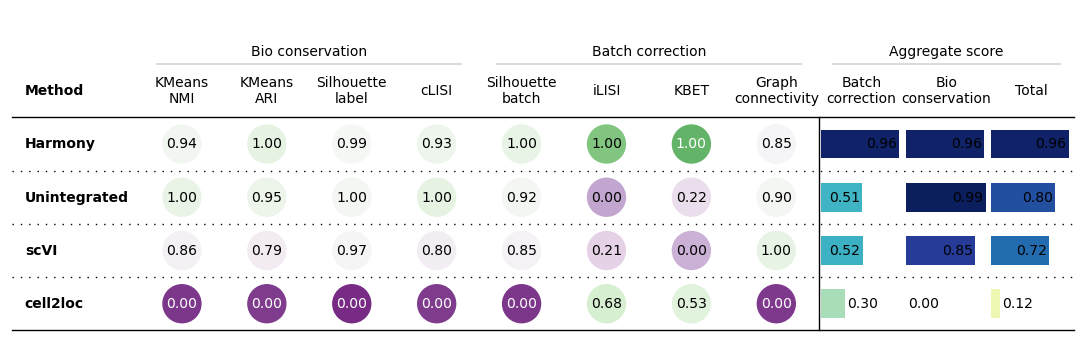

In [22]:
bm.plot_results_table()

In [13]:
import os
import tempfile

from PIL import Image
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.backends.backend_pdf import PdfPages
import random
import pandas as pd


import numpy as np
import scanpy as sc
import seaborn as sns
#import torch
from scib_metrics.benchmark import Benchmarker, BioConservation, BatchCorrection

import faiss

from scib_metrics.nearest_neighbors import NeighborsResults
import anndata as ad

from scib.metrics import cell_cycle
# https://scib.readthedocs.io/en/latest/api/scib.metrics.cell_cycle.html

In [6]:
pathout = '/data/kanferg/Sptial_Omics/projects/NguyenLab/spatialomicstoolkit/out_1'
adata_concat = sc.read_h5ad(os.path.join(pathout, "andata_filter_logNorm_hvg_leiden_harmony_scvi_con_mouse_cov_umap.h5ad"))
Experimental_design_file = '/data/kanferg/Sptial_Omics/projects/NguyenLab/spatialomicstoolkit/Experimental_design/Experimental_Design.csv'
ed = pd.read_csv(Experimental_design_file)
column_sel = ed.columns[2:4].tolist()+ed.columns[5:8].tolist()

from tqdm import tqdm
# adding covrites per batch to andata
for column in column_sel:
    adata_concat.obs[column] = None
    for batch in tqdm(ed['Polygon']):
        covraite_temp = ed.loc[ed["Polygon"]==batch,column].values.tolist()*len(adata_concat.obs.loc[adata_concat.obs["batch"]==str(batch),column])
        adata_concat.obs.loc[adata_concat.obs["batch"]==str(batch),column] = covraite_temp
        # if isinstance(adata_concat.obs[column].dtype, pd.CategoricalDtype):
        #     print('not') 
        # else:
        #     adata_concat.obs[column] = adata_concat.obs[column].astype("category")
adata_concat.obs['Condition '] = adata_concat.obs['Condition '].astype("category")
adata_concat.obs['Technical_repeat'] = adata_concat.obs['Technical_repeat'].astype("category")
adata_concat.obs['Mouse_ID'] = adata_concat.obs['Mouse_ID'].astype("category")
adata_concat.obs['Harvest_Day'] = adata_concat.obs['Harvest_Day'].astype("category")

100%|█████████████████████████████████████████████████████████████████████████████████████| 62/62 [00:00<00:00, 187.88it/s]


In [7]:
def select_slide(adata, s, s_col='sample'):
    r""" Select data for one slide from the spatial anndata object.

    :param adata: Anndata object with multiple spatial samples
    :param s: name of selected sample
    :param s_col: column in adata.obs listing sample name for each location
    """
    slide = adata[adata.obs[s_col]==s,:].copy()
    return slide

In [8]:
sample_sel = [58,54,50,26,1,56,27,30]
sample_sel = [str(i) for i in sample_sel]
mock_andata = ad.concat([select_slide(adata_concat,s = b, s_col = "batch") for b in sample_sel])

In [16]:
mock_andata_harmony = mock_andata.copy()
mock_andata_harmony.obsm["X_pca"] = mock_andata_harmony.obsm["X_cell2loc"]

In [17]:
mock_andata_harmony

AnnData object with n_obs × n_vars = 87809 × 2000
    obs: 'cell_id', 'transcript_counts', 'control_probe_counts', 'genomic_control_counts', 'control_codeword_counts', 'unassigned_codeword_counts', 'deprecated_codeword_counts', 'total_counts', 'cell_area', 'nucleus_area', 'nucleus_count', 'segmentation_method', 'region', 'z_level', 'cell_labels', 'batch', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'log1p_total_counts', 'outlier', 'cluster', '_scvi_batch', '_scvi_labels', 'cluster_Harmony', 'cluster_scVI', 'cluster_cell2loc', 'Sample_ID', 'Condition ', 'Technical_repeat', 'Mouse_ID', 'Harvest_Day'
    obsm: 'Unintegrated_umap', 'X_cell2loc', 'X_pca', 'X_pca_Harmony', 'X_pca_before', 'X_scVI', '_scvi_extra_categorical_covs', 'cell2lo_umap', 'harmony_umap', 'scVI_umap', 'spatial'
    layers: 'counts', 'log', 'scvi_normalized'